# **REGRESI LINIER**
Salah satu teknik pemelajarn mesin (*machine learning* / ML) yang paling sederhana  dan umum adalah regresi linier. Regresi linier adalah salah satu dari jenis analisis peramalan atau prediksi yang sering digunakan pada data berskala kuantitatif (interval atau rasio). Analisis regresi mempelajari bentuk hubungan antara satu atau lebih peubah/variabel bebas (X) dengan satu peubah tak bebas (Y)
Berikut tutorial dari teknik ML paling sederhana :

Pertama, impor semua *libraries* yang dibutuhkan :

In [ ]:
#Sumber : https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!gdown https://drive.google.com/uc?id=1oYirFB-NrhMcZowh4pSGjlrDIWOsPRry -O Wheather.csv

Downloading...
From: https://drive.google.com/uc?id=1oYirFB-NrhMcZowh4pSGjlrDIWOsPRry
To: /content/Wheather.csv
11.2MB [00:00, 98.4MB/s]


## Persiapan Dataset 

download dataset disini: https://drive.google.com/file/d/1fiHg5DyvQeRC4SyhsVnje5dhJNyVWpO1/view

unggah dataset yang sudah diunduh ke collab


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Weather.csv to Weather.csv


Perintah berikut digunakan untuk mengimpor dataset CSV:

In [ ]:
dataset = pd.read_csv('Weather.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lihat ukuran dataset

In [ ]:
dataset.shape

(119040, 31)

cell diatas seharusnya menunjukkan nilai (119040, 31), yang berarti data berisi 119040 baris dan 31 kolom </br>

Untuk melihat detil secara statistik kita dapat menggunakan describe():

In [ ]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


Kemudian, kita dapat melakukan plot pada data kita di grafik 2 dimensi untuk melihat persebaran dari dataset kita.

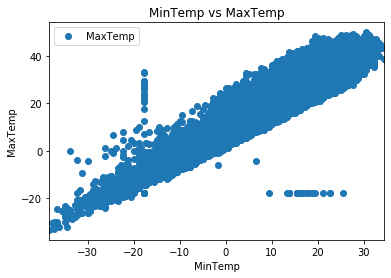

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

Setelah itu, kita bisa melakukan plot rata-rata temperature untuk menemukan dan melihat persebaran rata-rata temperature

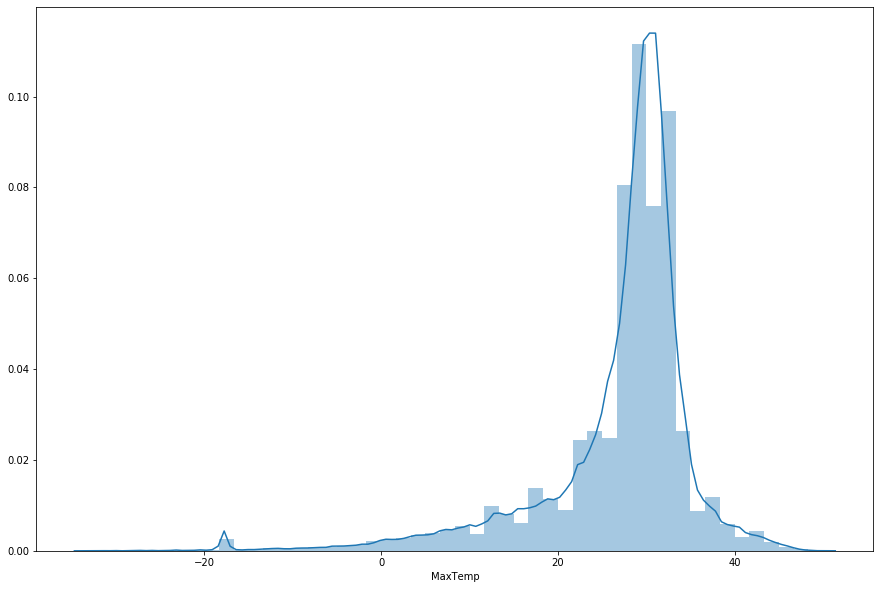

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

Langkah kita selanjutnya adalah memisahkan data ke 'attributes' dan 'labels'. </br>
- attributes adalah input yang akan digunakanan 
- sedangkan labels adalah target yang ingin dipelajari

Pada bagian ini kita ingin memprediksi kolom 'MaxTemp' dengan mengguanakan nilai masukan dari 'MinTemp' yang ada. 

In [ ]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

Kemudian, kita dapat melakukan *split* pada data yang ada, dengan aturan 80% data training dan 20% data testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Setelah kita melakukan split pada data training data testing, kita dapat melakukan training pada algoritma kita. 

### Training
Training dapat dilakukan dengan mengimport LinearRegression class.

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Seperti yang telah dijelaskan di materi persentasi, regresi liniear pada dasarnya adalah mencari nilai terbaik dari 'intercept' dan 'slope'.

Untuk melihat nilai 'intercept' dan 'slope' terbaik yang dikalkulasi oleh model, eksekusi kode berikut:


In [ ]:
#melihat intercept:
print(regressor.intercept_)
#melihat slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


##Testing
setelah kita melakukan training, fase berikutnya adalah melakukan testing. 

Pada dasarnya testing adalah fase dimana model menebak data yang belum pernah dilihat dan dilatih.

In [ ]:
y_pred = regressor.predict(X_test)


untuk lebih mudah dalam mengevaluasi, hasil prediksi dan target dapat kita visualisasikan dalam tabel

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


atau, bisa kita visualisasikan dalam bentuk grafik bar

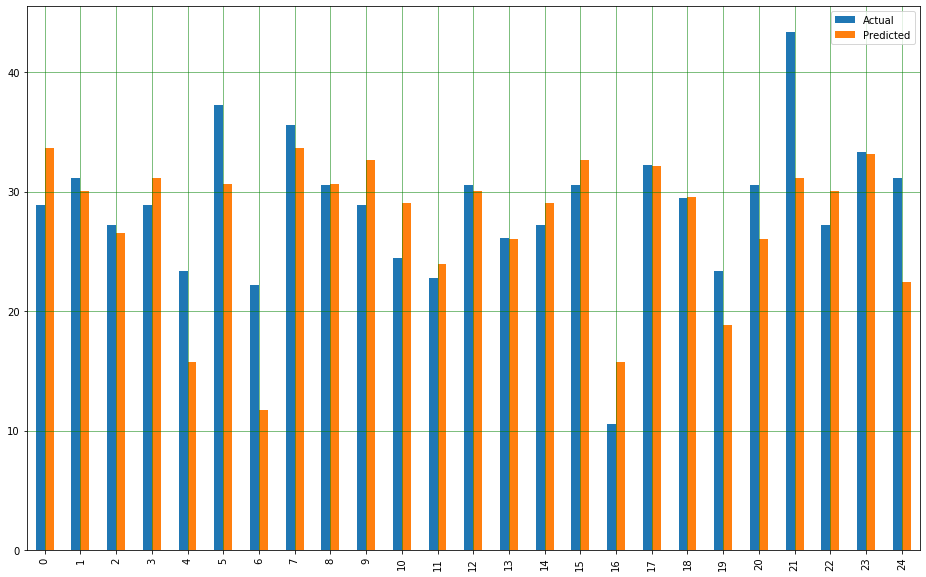

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Meskipun model kita tidak dapat memprediksi dengan sangat akurat, tapi hasil prediksi yang ada sudah dapat dikatakan cukup mendekati. 

Kita dapat juga memplot garis lurus dengan data test.

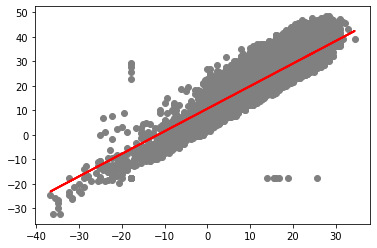

In [ ]:

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Selain melalui grafik kita dapat melakukan evaluasi dengan menggunakan metric tertentu, seperti: </br>
- MSE
- MAE
- RMSE
untuk menghitung metric-metric diatas, dapat dilakuakn dengan code:

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204
